    1. Install Dependencies

In [61]:
!pip install torch==1.8.2 torchvision==0.9.2 torchaudio===0.8.2 --extra-index-url https://download.pytorch.org/whl/lts/1.8/cu102

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/lts/1.8/cu102


In [3]:
!pip install ipywidgets

  Using cached ipywidgets-7.7.1-py2.py3-none-any.whl (123 kB)
  Using cached ipython_genutils-0.2.0-py2.py3-none-any.whl (26 kB)
  Using cached widgetsnbextension-3.6.1-py2.py3-none-any.whl (1.6 MB)
  Using cached jupyterlab_widgets-1.1.1-py3-none-any.whl (245 kB)
  Using cached notebook-6.4.12-py3-none-any.whl (9.9 MB)
  Using cached terminado-0.15.0-py3-none-any.whl (16 kB)
  Using cached prometheus_client-0.14.1-py3-none-any.whl (59 kB)
  Using cached argon2_cffi-21.3.0-py3-none-any.whl (14 kB)
     -------------------------------------- 563.8/563.8 kB 1.8 MB/s eta 0:00:00
  Using cached Send2Trash-1.8.0-py3-none-any.whl (18 kB)
  Using cached nbformat-5.4.0-py3-none-any.whl (73 kB)
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Using cached defusedxml-0.7.1-py2.py3-none-any.whl (25 kB)
  Using cached nbclient-0.6.6-py3-none-any.whl (71 kB)
  Using cached beautifulsoup4-4.11.1-py3-none-any.whl (128 kB)
  Using cached jupyterlab_pygments-0.2.2-py2.py3-none-any.whl (21 kB)
  

In [4]:
import torch
torch.cuda.is_available()

True

In [5]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [54]:
!cd yolov5 & pip install -r requirements.txt

In [11]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

    2. Load Model

In [8]:
model = torch.hub.load('ultralytics/yolov5','yolov5s')

Using cache found in C:\Users\ninwo/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5 🚀 2022-8-13 Python-3.8.6 torch-1.8.2+cu111 CUDA:0 (NVIDIA GeForce GTX 1660, 6144MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


    3. Make Detections

In [9]:
img = 'https://tse4.mm.bing.net/th?id=OIP.0TUBmEnynYDJdAn-C2MO6wHaEL&pid=Api&P=0'

In [10]:
results = model(img)
results.print()

image 1/1: 267x474 19 cars, 4 buss, 5 trucks
Speed: 271.1ms pre-process, 16.0ms inference, 3.0ms NMS per image at shape (1, 3, 384, 640)


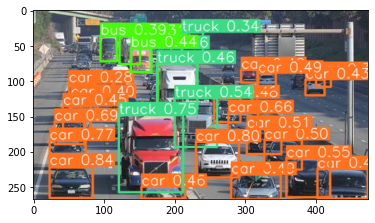

In [11]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

    4. Real Time Detections

In [37]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
    cap.release()
    cv2.destroyAllWindows()

    5. Train from Scratch

In [2]:
import uuid
import os
import time

In [3]:
IMAGES_PATH = os.path.join('data', 'images')
labels = ['happy', 'sad']
number_imgs = 20

In [45]:
cap = cv2.VideoCapture(0)
for label in labels:
    print('Collecting images for {}'.format(labels))
    time.sleep(5)
    
    for img_num in range(number_imgs):
        print('Collecting images for {}'.format(label, img_num))
        
        ret, frame = cap.read()
        
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        cv2.imwrite(imgname, frame)
        cv2.imshow('Image Collection', frame)
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [44]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number{}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname )

data\images\happy.d393a1a2-1a43-11ed-bbbe-7085c2dda1e9.jpg
data\images\happy.d393a1a3-1a43-11ed-aaf9-7085c2dda1e9.jpg
data\images\happy.d393a1a4-1a43-11ed-a0d9-7085c2dda1e9.jpg
data\images\happy.d393a1a5-1a43-11ed-a523-7085c2dda1e9.jpg
data\images\happy.d393a1a6-1a43-11ed-a8f3-7085c2dda1e9.jpg
data\images\happy.d393a1a7-1a43-11ed-b34e-7085c2dda1e9.jpg
data\images\happy.d393a1a8-1a43-11ed-95f2-7085c2dda1e9.jpg
data\images\happy.d393a1a9-1a43-11ed-89c4-7085c2dda1e9.jpg
data\images\happy.d393a1aa-1a43-11ed-9f25-7085c2dda1e9.jpg
data\images\happy.d393a1ab-1a43-11ed-b879-7085c2dda1e9.jpg
data\images\happy.d393a1ac-1a43-11ed-85e5-7085c2dda1e9.jpg
data\images\happy.d393a1ad-1a43-11ed-8136-7085c2dda1e9.jpg
data\images\happy.d393a1ae-1a43-11ed-93a7-7085c2dda1e9.jpg
data\images\happy.d393a1af-1a43-11ed-ac3e-7085c2dda1e9.jpg
data\images\happy.d393a1b0-1a43-11ed-96c9-7085c2dda1e9.jpg
data\images\happy.d393a1b1-1a43-11ed-8042-7085c2dda1e9.jpg
data\images\happy.d393a1b2-1a43-11ed-9cbc-7085c2dda1e9.j

In [46]:
!git clone https://github.com/tzutalin/labelimg

Cloning into 'labelimg'...


In [14]:
!pip install pyqt5 lxml --upgrade
!cd labelimg && pyrcc5 -o libs/resources.py resources.qrc

In [15]:
!pip install wandb

In [62]:
!cd yolov5 && python train.py --img 320 --batch 16 --epoch 500 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: \u26a0\ufe0f YOLOv5 is out of date by 2 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 \U0001f680 v6.1-386-g2e57b84 Python-3.8.6 torch-1.8.2+cu102 CUDA:0 (NVIDIA GeForce GTX 1660, 6144MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, o

In [20]:
!pip install clearml

In [20]:
!pip install clearml

In [50]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Wed_Oct_23_19:32:27_Pacific_Daylight_Time_2019
Cuda compilation tools, release 10.2, V10.2.89


    6. Load Custom Model

In [6]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp21/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\ninwo/.cache\torch\hub\master.zip
YOLOv5  2022-9-10 Python-3.8.6 torch-1.8.2+cu102 CUDA:0 (NVIDIA GeForce GTX 1660, 6144MiB)

Fusing layers... 
Model summary: 213 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [7]:
img = os.path.join('data', 'images', 'sad.00033a25-1a44-11ed-bc0c-7085c2dda1e9.jpg' )

In [8]:
results = model(img)

In [9]:
results.print()

image 1/1: 480x640 1 sad
Speed: 24.0ms pre-process, 95.1ms inference, 15.0ms NMS per image at shape (1, 3, 480, 640)


    7. Real Time Detections

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
  